In [49]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [81]:
DATASET = 'cat'

SCALING = True

GRIDSEARCH = False

In [4]:
if DATASET == 'cat':
    df = pd.read_csv("../data/speeddating/speeddating_cat.csv")
else:
    
    df = pd.read_csv("../data/speeddating/speeddating_num.csv")

train, test = train_test_split(df, test_size=0.2, random_state=44)

X_train = train.drop(['match'], axis=1)
y_train = train['match']
X_test = test.drop(['match'], axis=1)
y_test = test['match']

In [43]:
df.describe()#.to_csv('descr.csv', index=False)

,wave,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,...,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,gender_female,gender_male
count,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,...,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000,7849.000000
mean,11.324118,1.321697,0.404892,0.948401,0.909925,1.064849,0.828004,1.128551,0.785196,0.220283,...,0.568353,0.079501,0.064212,0.240031,0.048796,0.566696,0.080647,0.063830,0.499809,0.500191
std,5.975309,1.034984,0.490902,0.790658,0.793009,0.803756,0.712296,0.684704,0.698389,0.440688,...,0.495337,0.270536,0.245146,0.427129,0.215455,0.495563,0.272310,0.244465,0.500032,0.500032
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,21.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
if SCALING:
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

#### Define Hyperparameters to test

In [45]:
# knn
n_neighbour = np.arange(9, 21, 2) 
weights = ['uniform', 'distance']

# svc
svc_kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# trees
tree_max_depth = [6, 9, 12, 15]
tree_min_split = [3, 6, 9, 12]
forest_n_estimators = np.arange(15, 30)
forest_max_depth = np.arange(15, 30)
forest_min_split = np.arange(15, 30)

### scores

In [84]:
# Scores: MSE, RMSE, R2
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

# Metrics: various fancy metrics
def print_metrics(y_test, y_pred):
    results = pd.DataFrame(list(zip(y_test, y_pred)), 
                   columns =['Wage_test', 'Wage_prediction']) 
    
    accuracy = results["Wage_test"] - results["Wage_prediction"]
    accuracy = np.square(accuracy)
    accuracy = np.sqrt(accuracy)
    
    print("# compare test and prediction")
    print(results)
    
    print("# bad predictions (over 100 difference)")
    print(results[(results["Wage_test"] - results["Wage_prediction"]) > 5])
    
    print("# span of data")
    span = results["Wage_test"].max() - results["Wage_test"].min()
    print(span)
    
    print("# median accuracy")
    median = np.median(accuracy) 
    print(median)
    
    print("# percent deviation")
    percent = median / span * 100
    percent_str = "{:.4f}".format(percent)
    percent_str = percent_str + " %"
    print(percent_str)
    
def show_roc(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### KNN

In [47]:
def knn_grid(X_train, y_train, X_test):
    print('KNN')
    grid = GridSearchCV(estimator=KNeighborsClassifier(),
                 param_grid={'n_neighbors': n_neighbour,
                            'weights': weights})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    return grid.predict(X_test)

def knn(X_train, y_train, X_test):
    knn = KNeighborsClassifier(n_neighbors = 19, weights= 'distance')
    knn.fit(X_train, y_train)
    return knn.predict(X_test)
    
if GRIDSEARCH:
    y_test_knn = knn_grid(X_train, y_train, X_test)
else:
    y_test_knn = knn(X_train, y_train, X_test)


MSE:  0.15668789808917197
RMSE:  0.3958382221175363
R2:  -12.017959070026428
# compare test and prediction
      Wage_test  Wage_prediction
0             1                0
1             0                0
2             1                0
3             0                0
4             0                0
...         ...              ...
1565          0                0
1566          0                0
1567          1                0
1568          0                0
1569          0                0

[1570 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[1295   11]
 [ 235   29]]


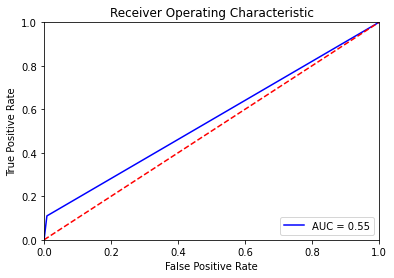

In [48]:
print_performance(y_test, y_test_knn)
print_metrics(y_test, y_test_knn)
print(metrics.confusion_matrix(y_test, y_test_knn))
show_roc(y_test, y_test_knn)

#### SVC

In [85]:
def svc_grid(X_train, y_train, X_test):
    print('\nSVC')
    grid = GridSearchCV(estimator=SVC(random_state = 42),
                 param_grid={'kernel': svc_kernel})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred = grid.predict(X_test)
    return y_pred

def svc(X_train, y_train, X_test):
    svc = LinearSVC(random_state = 42)
    svc.fit(X_train, y_train)
    return svc.predict(X_test)

if GRIDSEARCH:
    y_test_svc = svc_grid(X_train, y_train, X_test)
else:
    y_test_svc = svc(X_train, y_train, X_test)


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MSE:  0.0
RMSE:  0.0
R2:  100.0
# compare test and prediction
      Wage_test  Wage_prediction
0             1                1
1             0                0
2             1                1
3             0                0
4             0                0
...         ...              ...
1565          0                0
1566          0                0
1567          1                1
1568          0                0
1569          0                0

[1570 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[1306    0]
 [   0  264]]


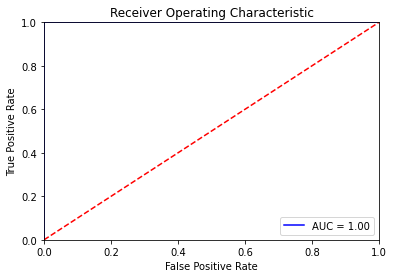

In [86]:
print_performance(y_test, y_test_svc)
print_metrics(y_test, y_test_svc)
print(metrics.confusion_matrix(y_test, y_test_svc))
show_roc(y_test, y_test_svc)

#### Random Forest

In [51]:
def randomForest_grid(X_train, y_train, X_test):
    print('\nRandom Forest')
    grid = GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid={'n_estimators': forest_n_estimators,
                             'max_depth': forest_max_depth,
                             'min_samples_leaf': forest_min_split})
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred = grid.predict(X_test)
    return y_pred

def randomForest(X_train, y_train, X_test):
    print('\nRandom Forest')
    
    if DATASET == 'cat':
        if SCALING:
            rf = RandomForestClassifier(max_depth = 15, min_samples_leaf = 15, n_estimators = 21)
        else:
            rf = RandomForestClassifier(max_depth = 28, min_samples_leaf = 15, n_estimators = 18)
    else:
        if SCALING:
            rf = RandomForestClassifier(max_depth = 16, min_samples_leaf = 15, n_estimators = 20)
        else:
            rf = RandomForestClassifier(max_depth = 20, min_samples_leaf = 16, n_estimators = 27)
    

    rf.fit(X_train, y_train)
    return rf.predict(X_test)

if GRIDSEARCH:
    y_test_rf = randomForest_grid(X_train, y_train, X_test)
else:
    y_test_rf = randomForest(X_train, y_train, X_test)



Random Forest


MSE:  0.05159235668789809
RMSE:  0.22713950930628096
R2:  63.11603786718643
# compare test and prediction
      Wage_test  Wage_prediction
0             1                1
1             0                0
2             1                1
3             0                0
4             0                0
...         ...              ...
1565          0                0
1566          0                0
1567          1                0
1568          0                0
1569          0                0

[1570 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
1
# median accuracy
0.0
# percent deviation
0.0000 %
[[1306    0]
 [   0  264]]


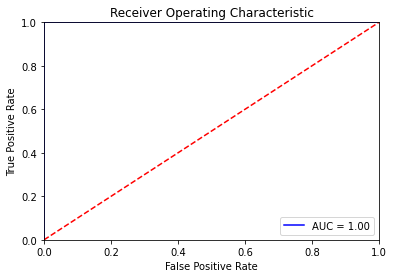

In [52]:
print_performance(y_test, y_test_rf)
print_metrics(y_test, y_test_rf)
print(metrics.confusion_matrix(y_test, y_test_svc))
show_roc(y_test, y_test_svc)

In [87]:
############################################################################################

# Cooles Metric Vergleichs Zeugs juhuu 😎😎😎

In [77]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score

def get_knn_scores(X_train, y_train, X_test, y_test, k_range, metric):
    P, R, A, BA, ks = [], [], [], [], []
    for k in k_range:
        if k % 2 != 0:
            knn = KNeighborsClassifier(n_neighbors = k, weights= 'distance', metric=metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)

            P.append(precision_score(y_test, y_pred))
            R.append(recall_score(y_test, y_pred))
            A.append(accuracy_score(y_test, y_pred))
            BA.append(balanced_accuracy_score(y_test, y_pred))
            ks.append(k)
    
    return P,R,A,BA, ks


def get_svc_scores(X_train, y_train, X_test, y_test, C_range):
    P, R, A, BA, Cs = [], [], [], [], []
    for C in C_range:
        svc = LinearSVC(random_state = 42, C=C)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)

        P.append(precision_score(y_test, y_pred))
        R.append(recall_score(y_test, y_pred))
        A.append(accuracy_score(y_test, y_pred))
        BA.append(balanced_accuracy_score(y_test, y_pred))
        Cs.append(C)
    
    return P,R,A,BA, Cs

In [72]:
# manhattan | euclidean | chebyshev
metric = 'chebyshev'
k_range = np.arange(1,29)

P,R,A,BA,ks = get_knn_scores(X_train, y_train, X_test, y_test, k_range, metric)

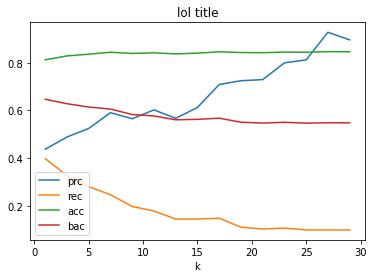

In [43]:
plt.plot(ks, P)
plt.plot(ks, R)
plt.plot(ks, A)
plt.plot(ks, BA)
plt.legend(['prc', 'rec', 'acc', 'bac'], loc='lower left')
plt.title('lol title')
plt.xlabel('k')
plt.show()

In [78]:
C_range = np.logspace(-3, 3, num=30)

P,R,A,BA,Cs = get_svc_scores(X_train, y_train, X_test, y_test, C_range)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


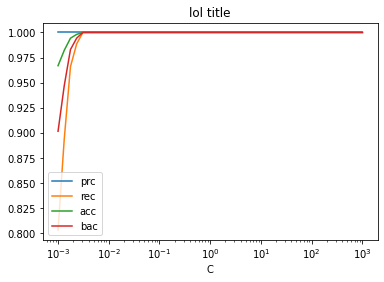

In [61]:
plt.plot(Cs, P)
plt.plot(Cs, R)
plt.plot(Cs, A)
plt.plot(Cs, BA)
plt.legend(['prc', 'rec', 'acc', 'bac'], loc='lower left')
plt.title('lol title')
plt.xlabel('C')
plt.xscale('log')
plt.show()